# Municipalities, Gardens, and Toxic Release Map

In [115]:
# libraries
import pandas as pd
import geopandas as gpd
import numpy as np

import contextily as ctx
import matplotlib.pyplot as plt
import folium

In [143]:
# loading files

# municipalities list
munis = pd.read_csv('C:/Users/melod/Documents/data science/Food-Systems-Policy-Research/Food Systems and General Plans/data/Municipalities List.csv')

# municipal boundaries for LA County cities
LACcitieslines  = gpd.read_file('C:/Users/melod/Documents/data science/Food-Systems-Policy-Research/Food Systems and General Plans/data/City_Boundaries.geojson')

# toxic release data for California
toxrel = pd.read_csv('C:/Users/melod/Documents/data science/Food-Systems-Policy-Research/Food Systems and General Plans/data/2021_ca.csv')

# LA County urban agriculture sites
UALAC = pd.read_excel('C:/Users/melod/Documents/data science/Food-Systems-Policy-Research/Food Systems and General Plans/data/Cultivate LA sites (as of 4.1.2017).xlsx')

In [144]:
LACcitieslines.head(2)

OBJECTID      CITY_NAME     CITY_LABEL  ABBR  OF_AREA_SM CITY_TYPE  \
0       366     Long Beach     Long Beach    LB      50.309      City   
1       367  Redondo Beach  Redondo Beach  RBCH       6.349      City   

    FEAT_TYPE                COLOR_EGIS                URL       PHONE  \
0  Breakwater  Purple - RGB 185,185,250  www.longbeach.gov  5625706555   
1       Water    Pink - RGB 255,190,232    www.redondo.org  3103721171   

           last_edited_date   ShapeSTArea  ShapeSTLength  \
0 2022-07-20 00:08:28+00:00  1.097324e+05    5448.776853   
1 2022-07-20 00:08:28+00:00  4.883225e+06   21127.481570   

                                            geometry  
0  POLYGON ((-118.11850 33.74278, -118.11855 33.7...  
1  POLYGON ((-118.39235 33.84190, -118.39238 33.8...

In [145]:
# checking projection
LACcitieslines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [146]:
LACcitieslines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   OBJECTID          347 non-null    int64              
 1   CITY_NAME         347 non-null    object             
 2   CITY_LABEL        347 non-null    object             
 3   ABBR              347 non-null    object             
 4   OF_AREA_SM        347 non-null    float64            
 5   CITY_TYPE         347 non-null    object             
 6   FEAT_TYPE         347 non-null    object             
 7   COLOR_EGIS        347 non-null    object             
 8   URL               347 non-null    object             
 9   PHONE             347 non-null    object             
 10  last_edited_date  347 non-null    datetime64[ns, UTC]
 11  ShapeSTArea       347 non-null    float64            
 12  ShapeSTLength     347 non-null    float64            
 1

In [147]:
# confirming that there are 88 munis + unincorporated placesi in this geojson file
LACcitieslines['CITY_NAME'].value_counts()

Unincorporated      190
Los Angeles          33
Long Beach           21
Redondo Beach        10
Santa Clarita         4
                   ... 
La Verne              1
Irwindale             1
Norwalk               1
Agoura Hills          1
Hawaiian Gardens      1
Name: CITY_NAME, Length: 89, dtype: int64

<Axes: >

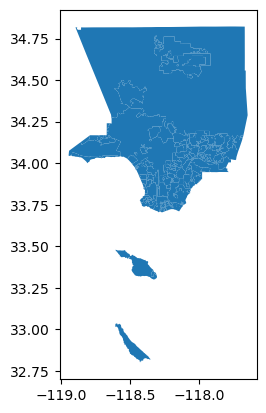

In [148]:
# plotting
LACcitieslines.plot()

### Toxic Release Data (cleaning)

In [149]:
# inspecting
toxrel['7. COUNTY'].value_counts()

LOS ANGELES        1330
SAN BERNARDINO      256
CONTRA COSTA        254
ORANGE              208
KERN                179
SAN DIEGO           159
ALAMEDA             114
SANTA CLARA          97
RIVERSIDE            95
SAN JOAQUIN          78
STANISLAUS           71
SOLANO               67
TULARE               63
SACRAMENTO           61
VENTURA              57
FRESNO               54
KINGS                49
SAN LUIS OBISPO      39
SONOMA               29
MERCED               28
MADERA               20
SHASTA               19
PLACER               19
YOLO                 18
SAN MATEO            16
SANTA BARBARA        16
IMPERIAL             13
LASSEN               12
SAN BENITO            9
SAN FRANCISCO         9
MONTEREY              8
HUMBOLDT              6
SISKIYOU              5
PLUMAS                5
AMADOR                4
YUBA                  4
NAPA                  3
GLENN                 3
INYO                  3
NEVADA                2
MENDOCINO             2
COLUSA          

In [150]:
# subsetting toxrelease data for counties of interest
toxrelLAC = toxrel[toxrel['7. COUNTY'] == 'LOS ANGELES']
toxrelVEN = toxrel[toxrel['7. COUNTY'] == 'VENTURA']
toxrelSON = toxrel[toxrel['7. COUNTY'] == 'SONOMA']
toxrelMEN= toxrel[toxrel['7. COUNTY'] == 'MENDOCINO']
toxrelLAK= toxrel[toxrel['7. COUNTY'] == 'LAKE']

# looking at LAC
toxrelLAC.tail(3)

1. YEAR         2. TRIFD     3. FRS ID  \
3483     2021  90245CHVRN324WE  110002899908   
3487     2021  90749RCPRD1801E  110017428988   
3488     2021  90749RCPRD1801E  110017428988   

                                   4. FACILITY NAME       5. STREET ADDRESS  \
3483   CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.   324 W EL SEGUNDO BLVD   
3487  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   
3488  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   

         6. CITY    7. COUNTY 8. ST  9. ZIP  10. BIA  ...  \
3483  EL SEGUNDO  LOS ANGELES    CA   90245      NaN  ...   
3487      CARSON  LOS ANGELES    CA   90745      NaN  ...   
3488      CARSON  LOS ANGELES    CA   90745      NaN  ...   

     110. 8.2 - ENERGY RECOVER ON  111. 8.3 - ENERGY RECOVER OF  \
3483                          0.0                           0.0   
3487                          0.0                           0.0   
3488                          0.0                           0.0   

      112. 8.4 - RECYCLING ON SITE 113. 8.5 - RECYCLING OFF SIT  \
3483                           0.0                          0.0   
3487                           0.0                          0.0   
3488                           0.0                          0.0   

     114. 8.6 - TREATMENT ON SITE 115. 8.7 - TREATMENT OFF SITE  \
3483                     120000.0                           0.0   
3487                          0.0                           0.0   
3488                          0.0                           0.0   

     116. PRODUCTION WSTE (8.1-8.7) 117. 8.8 - ONE-TIME RELEASE  \
3483                       124800.0                         NaN   
3487                          398.0                         NaN   
3488                           19.0                         NaN   

      118. PROD_RATIO_OR_ ACTIVITY 119. 8.9 - PRODUCTION RATIO  
3483                    PRODUCTION                        1.33  
3487                    PRODUCTION                        1.20  
3488                    PRODUCTION                        1.45  

[3 rows x 119 columns]

In [151]:
# subset toxrelLAC
toxrelLAC = toxrelLAC[['2. TRIFD', '4. FACILITY NAME', '5. STREET ADDRESS','6. CITY', '7. COUNTY', '10. BIA', 
                       '11. TRIBE', '12. LATITUDE',
                       '13. LONGITUDE', '14. HORIZONTAL DATUM', '19. INDUSTRY SECTOR CODE', '20. INDUSTRY SECTOR',
                       '27. PRIMARY NAICS', '43. CARCINOGEN', '47. UNIT OF MEASURE', '50. 5.3 - WATER', 
                       '51. 5.4 - UNDERGROUND', '52. 5.4.1 - UNDERGROUND CL I', 
                       '53. 5.4.2 - UNDERGROUND C II-V', '54. 5.5.1 - LANDFILLS', 
                       '55. 5.5.1A - RCRA C LANDFILL', '56. 5.5.1B - OTHER LANDFILLS', '57. 5.5.2 - LAND TREATMENT',
                       '58. 5.5.3 - SURFACE IMPNDMNT','59. 5.5.3A - RCRA SURFACE IM', '60. 5.5.3B - OTHER SURFACE I', 
                       '61. 5.5.4 - OTHER DISPOSAL', '62. ON-SITE RELEASE TOTAL', '85. OFF-SITE RELEASE TOTAL',
                       '91. OFF-SITE RECYCLED TOTAL', '101. OFF-SITE TREATED TOTAL', 
                       '116. PRODUCTION WSTE (8.1-8.7)', '117. 8.8 - ONE-TIME RELEASE']]
toxrelLAC.tail(3)

2. TRIFD                               4. FACILITY NAME  \
3483  90245CHVRN324WE   CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.   
3487  90749RCPRD1801E  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS   
3488  90749RCPRD1801E  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS   

           5. STREET ADDRESS     6. CITY    7. COUNTY  10. BIA 11. TRIBE  \
3483   324 W EL SEGUNDO BLVD  EL SEGUNDO  LOS ANGELES      NaN       NaN   
3487  24696 S WILMINGTON AVE      CARSON  LOS ANGELES      NaN       NaN   
3488  24696 S WILMINGTON AVE      CARSON  LOS ANGELES      NaN       NaN   

      12. LATITUDE  13. LONGITUDE 14. HORIZONTAL DATUM  ...  \
3483       33.9082      -118.4085                NAD83  ...   
3487       33.8099      -118.2383                NAD83  ...   
3488       33.8099      -118.2383                NAD83  ...   

      58. 5.5.3 - SURFACE IMPNDMNT 59. 5.5.3A - RCRA SURFACE IM  \
3483                           0.0                          0.0   
3487                           0.0                          0.0   
3488                           0.0                          0.0   

      60. 5.5.3B - OTHER SURFACE I 61. 5.5.4 - OTHER DISPOSAL  \
3483                           0.0                        0.0   
3487                           0.0                        0.0   
3488                           0.0                        0.0   

     62. ON-SITE RELEASE TOTAL  85. OFF-SITE RELEASE TOTAL  \
3483                    4800.0                         0.0   
3487                       0.0                       400.0   
3488                      19.0                         0.0   

      91. OFF-SITE RECYCLED TOTAL  101. OFF-SITE TREATED TOTAL  \
3483                          0.0                          0.0   
3487                          0.0                          0.0   
3488                          0.0                          0.0   

      116. PRODUCTION WSTE (8.1-8.7)  117. 8.8 - ONE-TIME RELEASE  
3483                        124800.0                          NaN  
3487                           398.0                          NaN  
3488                            19.0                          NaN  

[3 rows x 33 columns]

In [152]:
# rename geometry columns
toxrelLAC.rename(columns ={ '12. LATITUDE': 'LAT', '13. LONGITUDE': 'LON'}, inplace=True)

# convert to gdf
toxrelLACg = gpd.GeoDataFrame(toxrelLAC, geometry=gpd.points_from_xy(toxrelLAC.LON, toxrelLAC.LAT, 
                                          crs='EPSG:4326'))
toxrelLACg.tail(3)

2. TRIFD                               4. FACILITY NAME  \
3483  90245CHVRN324WE   CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.   
3487  90749RCPRD1801E  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS   
3488  90749RCPRD1801E  TESORO LOS ANGELES REFINERY-CARSON OPERATIONS   

           5. STREET ADDRESS     6. CITY    7. COUNTY  10. BIA 11. TRIBE  \
3483   324 W EL SEGUNDO BLVD  EL SEGUNDO  LOS ANGELES      NaN       NaN   
3487  24696 S WILMINGTON AVE      CARSON  LOS ANGELES      NaN       NaN   
3488  24696 S WILMINGTON AVE      CARSON  LOS ANGELES      NaN       NaN   

          LAT       LON 14. HORIZONTAL DATUM  ...  \
3483  33.9082 -118.4085                NAD83  ...   
3487  33.8099 -118.2383                NAD83  ...   
3488  33.8099 -118.2383                NAD83  ...   

      59. 5.5.3A - RCRA SURFACE IM 60. 5.5.3B - OTHER SURFACE I  \
3483                           0.0                          0.0   
3487                           0.0                          0.0   
3488                           0.0                          0.0   

      61. 5.5.4 - OTHER DISPOSAL 62. ON-SITE RELEASE TOTAL  \
3483                         0.0                    4800.0   
3487                         0.0                       0.0   
3488                         0.0                      19.0   

     85. OFF-SITE RELEASE TOTAL  91. OFF-SITE RECYCLED TOTAL  \
3483                        0.0                          0.0   
3487                      400.0                          0.0   
3488                        0.0                          0.0   

      101. OFF-SITE TREATED TOTAL  116. PRODUCTION WSTE (8.1-8.7)  \
3483                          0.0                        124800.0   
3487                          0.0                           398.0   
3488                          0.0                            19.0   

      117. 8.8 - ONE-TIME RELEASE                     geometry  
3483                          NaN  POINT (-118.40850 33.90820)  
3487                          NaN  POINT (-118.23830 33.80990)  
3488                          NaN  POINT (-118.23830 33.80990)  

[3 rows x 34 columns]

### Urban Agriculture Sites in Los Angeles County (cleaning)

In [153]:
# inspecting urban ag data
UALAC.tail(3)

objectid                        name                address  lng  lat  \
1137      2342     Uncommon Good, Site #16  333 North College Way  0.0  0.0   
1138      3527  John R. Wooden High School   18741 Elkwood Street  0.0  0.0   
1139      3927               GrowGood Farm     5600 MANSFIELD WAY  0.0  0.0   

              type_ subtype_ source  verified  exisitng         contact  \
1137           Farm      NaN    NaN       NaN       NaN    Nancy Mintie   
1138  School Garden     High    NaN  Verified  New Site     Karen Snook   
1139           Farm      NaN    NaN  Verified  New Site  (323) 645-0215   

                         website  \
1137        www.uncommongood.org   
1138  kindredspiritscarefarm.org   
1139  https://www.grow-good.org/   

                                               comment_       city  \
1137                                                NaN  Claremont   
1138  Kindred Spirits Care Farm partners with John R...     Reseda   
1139                                                NaN       Bell   

           state         zip  
1137          CA  91711-4429  
1138          CA       91335  
1139  California       90201

In [154]:
# convert to gdf
UALACg = gpd.GeoDataFrame(UALAC, geometry=gpd.points_from_xy(UALAC.lng, UALAC.lat, 
                                          crs='EPSG:4326'))
UALACg.tail(3)

objectid                        name                address  lng  lat  \
1137      2342     Uncommon Good, Site #16  333 North College Way  0.0  0.0   
1138      3527  John R. Wooden High School   18741 Elkwood Street  0.0  0.0   
1139      3927               GrowGood Farm     5600 MANSFIELD WAY  0.0  0.0   

              type_ subtype_ source  verified  exisitng         contact  \
1137           Farm      NaN    NaN       NaN       NaN    Nancy Mintie   
1138  School Garden     High    NaN  Verified  New Site     Karen Snook   
1139           Farm      NaN    NaN  Verified  New Site  (323) 645-0215   

                         website  \
1137        www.uncommongood.org   
1138  kindredspiritscarefarm.org   
1139  https://www.grow-good.org/   

                                               comment_       city  \
1137                                                NaN  Claremont   
1138  Kindred Spirits Care Farm partners with John R...     Reseda   
1139                                                NaN       Bell   

           state         zip                 geometry  
1137          CA  91711-4429  POINT (0.00000 0.00000)  
1138          CA       91335  POINT (0.00000 0.00000)  
1139  California       90201  POINT (0.00000 0.00000)

In [155]:
# for now, until I can geocode locations w/o coordinates, dropping locations w/o coordinates (25 locations)
UALACg2 = UALACg[UALACg.lng != 0.0]
print(UALACg.shape)
print(UALACg2.shape)

(1140, 17)
(1015, 17)


Aggregating counts of (1) urban agriculture sites and (2) toxic release facilities for in each municipality for choropleth layer on a map.

In [ ]:
# toxrelLAC column for munis
toxrelLAC["6. CITY"]
# UALAC
UALACg2['city']
# city bounds
LACcitieslines['CITY_NAME']
# munis list
munis['City/Municipality']

In [156]:
# aggregating urban ag sites in LAC

# renaming columns 
UALACg2.rename(columns = {'city': 'City', 'name': 'UA Sites'}, inplace = True)

# adjusting letter case of cities in city column
UALACg2['City'] = UALACg2['City'].str.title()

UAsites = UALACg2.groupby('City')['UA Sites'].count()
UAsites

C:\Users\melod\AppData\Local\Temp\ipykernel_30084\1142825573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UALACg2.rename(columns = {'city': 'City', 'name': 'UA Sites'}, inplace = True)
C:\Users\melod\Programs\envs\uds\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


City
Acton                5
Agoura Hills         3
Alhambra             7
Altadena             9
Arcadia              5
                    ..
Westlake Village     1
Whittier            12
Willowbrook          1
Wilmington           3
Woodland Hills       6
Name: UA Sites, Length: 150, dtype: int64

In [165]:
# aggregating toxic release facilities in LAC

# renaming columns
toxrelLACg.rename(columns = {'6. CITY': 'City', '4. FACILITY NAME': 'Facilities',
                            '62. ON-SITE RELEASE TOTAL': 'Release Total'}, inplace = True)

# adjusting letter case of cities in city column
toxrelLACg['City'] = toxrelLACg['City'].str.title()

# aggregating facility counts by city
toxrelsites = toxrelLACg.groupby('City')['Facilities'].count()
toxrelsites

City
Arcadia             6
Arleta              5
Artesia             3
Avalon              5
Azusa              30
                 ... 
Walnut              1
West Covina         1
West Hollywood      1
Whittier           10
Wilmington        123
Name: Facilities, Length: 67, dtype: int64

In [166]:
# aggregating toxic release discharge totals in LAC by city
discharge = toxrelLACg.groupby('City')['Release Total'].sum()
discharge

City
Arcadia                0.000000
Arleta                13.500000
Artesia                0.100000
Avalon              2631.000000
Azusa               5938.000000
                      ...      
Walnut                 0.000000
West Covina            0.590000
West Hollywood         0.000000
Whittier              79.000000
Wilmington        405984.135041
Name: Release Total, Length: 67, dtype: float64

In [158]:
# renaming city column in LAC city boundaries gdf
LACcitieslines.rename(columns = {'CITY_NAME': 'City'}, inplace = True) 

# resetting index for munis LAC df boundaries gdf
LACcitieslines.set_index('City', inplace = True)

In [178]:
# joining counts of toxic release sites to muni gdf
LACfinal = LACcitieslines.join(toxrelsites)

# replacing NaN values
LACfinal['Facilities'].replace(np.nan, 0, inplace = True)
print(LACfinal['Facilities'].isna().sum())

0


In [179]:
# joining discharge totals to muni gdf
LACfinal = LACfinal.join(discharge)

# replacing NaN values
LACfinal['Release Total'].replace(np.nan, 0, inplace = True)
print(LACfinal['Release Total'].isna().sum())

0


In [180]:
# joining counts of UA sites to muni gdf
LACfinal = LACfinal.join(UAsites)

# replacing NaN values
LACfinal['UA Sites'].replace(np.nan, 0, inplace = True)
print(LACfinal['UA Sites'].isna().sum())

0


In [161]:
# renaming city column in muni list
munis.rename(columns = {'City/Municipality': 'City'}, inplace = True)

In [164]:
# setting index for munis list
munis.set_index('City', inplace = True)

OBJECTID        CITY_LABEL  ABBR  OF_AREA_SM CITY_TYPE  \
City                                                                       
Agoura Hills           548      Agoura Hills   AGH       8.054      City   
Alhambra               634          Alhambra   ALH       7.626      City   
Arcadia                646           Arcadia   ARC      11.368      City   
Artesia                622           Artesia   ART       1.614      City   
Avalon                 493            Avalon  AVLN       2.920      City   
...                    ...               ...   ...         ...       ...   
Walnut                 541            Walnut   WAL       8.611      City   
West Covina            528       West Covina  WCOV      16.150      City   
West Hollywood         633    West Hollywood    WD       1.981      City   
Westlake Village       547  Westlake Village   WLV       5.435      City   
Whittier               542          Whittier  WHIT      14.396      City   

                 FEAT_TYPE                COLOR_EGIS                      URL  \
City                                                                            
Agoura Hills          Land    Pink - RGB 255,190,232  www.agourahillscity.org   
Alhambra              Land    Pink - RGB 255,190,232   www.cityofalhambra.org   
Arcadia               Land  Purple - RGB 185,185,250        www.arcadiaca.gov   
Artesia               Land   Green - RGB 203,255,112     www.cityofartesia.us   
Avalon                Land  Orange - RGB 230,190,112     www.cityofavalon.com   
...                    ...                       ...                      ...   
Walnut                Land  Orange - RGB 230,190,112     www.cityofwalnut.org   
West Covina           Land    Pink - RGB 255,190,232       www.westcovina.org   
West Hollywood        Land    Pink - RGB 255,190,232             www.weho.org   
Westlake Village      Land  Purple - RGB 185,185,250              www.wlv.org   
Whittier              Land    Pink - RGB 255,190,232   www.cityofwhittier.org   

                       PHONE          last_edited_date   ShapeSTArea  \
City                                                                   
Agoura Hills      8185977300 2022-07-20 00:08:28+00:00  2.179489e+08   
Alhambra          6265705007 2022-07-20 00:08:28+00:00  2.127651e+08   
Arcadia           6265745400 2022-07-20 00:24:20+00:00  3.096861e+08   
Artesia           5628656262 2022-07-20 00:08:28+00:00  4.520367e+07   
Avalon            3105100220 2022-07-20 00:08:28+00:00  8.033933e+07   
...                      ...                       ...           ...   
Walnut            9095957543 2022-07-20 00:08:28+00:00  2.503453e+08   
West Covina       6269398400 2022-07-20 00:08:28+00:00  4.479497e+08   
West Hollywood    3238486400 2022-07-20 00:08:28+00:00  5.283009e+07   
Westlake Village  8187061613 2022-07-20 00:08:28+00:00  1.533895e+08   
Whittier          5625679999 2022-12-27 18:38:26+00:00  4.086993e+08   

                  ShapeSTLength  \
City                              
Agoura Hills       80384.844465   
Alhambra           69047.146627   
Arcadia           132160.448944   
Artesia            40936.713195   
Avalon             57467.575832   
...                         ...   
Walnut             91654.932540   
West Covina       204530.303069   
West Hollywood     57026.140863   
Westlake Village   64458.709977   
Whittier          163336.203629   

                                                           geometry  \
City                                                                  
Agoura Hills      POLYGON ((-118.72864 34.16793, -118.73666 34.1...   
Alhambra          POLYGON ((-118.12191 34.10503, -118.12204 34.1...   
Arcadia           POLYGON ((-118.01824 34.17572, -118.01637 34.1...   
Artesia           POLYGON ((-118.07950 33.87674, -118.07946 33.8...   
Avalon            POLYGON ((-118.30821 33.33096, -118.30822 33.3...   
...                                                             ...   
Walnut        

In [183]:
# joining munis list to dataframe
LACfinal = LACfinal.join(munis)
LACfinal.head(5)

OBJECTID    CITY_LABEL  ABBR  OF_AREA_SM CITY_TYPE FEAT_TYPE  \
City                                                                         
Agoura Hills       548  Agoura Hills   AGH       8.054      City      Land   
Alhambra           634      Alhambra   ALH       7.626      City      Land   
Arcadia            646       Arcadia   ARC      11.368      City      Land   
Artesia            622       Artesia   ART       1.614      City      Land   
Avalon             493        Avalon  AVLN       2.920      City      Land   

                            COLOR_EGIS                      URL       PHONE  \
City                                                                          
Agoura Hills    Pink - RGB 255,190,232  www.agourahillscity.org  8185977300   
Alhambra        Pink - RGB 255,190,232   www.cityofalhambra.org  6265705007   
Arcadia       Purple - RGB 185,185,250        www.arcadiaca.gov  6265745400   
Artesia        Green - RGB 203,255,112     www.cityofartesia.us  5628656262   
Avalon        Orange - RGB 230,190,112     www.cityofavalon.com  3105100220   

                      last_edited_date   ShapeSTArea  ShapeSTLength  \
City                                                                  
Agoura Hills 2022-07-20 00:08:28+00:00  2.179489e+08   80384.844465   
Alhambra     2022-07-20 00:08:28+00:00  2.127651e+08   69047.146627   
Arcadia      2022-07-20 00:24:20+00:00  3.096861e+08  132160.448944   
Artesia      2022-07-20 00:08:28+00:00  4.520367e+07   40936.713195   
Avalon       2022-07-20 00:08:28+00:00  8.033933e+07   57467.575832   

                                                       geometry  Facilities  \
City                                                                          
Agoura Hills  POLYGON ((-118.72864 34.16793, -118.73666 34.1...         0.0   
Alhambra      POLYGON ((-118.12191 34.10503, -118.12204 34.1...         0.0   
Arcadia       POLYGON ((-118.01824 34.17572, -118.01637 34.1...         6.0   
Artesia       POLYGON ((-118.07950 33.87674, -118.07946 33.8...         3.0   
Avalon        POLYGON ((-118.30821 33.33096, -118.30822 33.3...         5.0   

              Release Total  UA Sites       County               Region  
City                                                                     
Agoura Hills            0.0       3.0  Los Angeles  Southern California  
Alhambra                0.0       7.0  Los Angeles  Southern California  
Arcadia                 0.0       5.0  Los Angeles  Southern California  
Artesia                 0.1       0.0  Los Angeles  Southern California  
Avalon               2631.0       1.0  Los Angeles  Southern California

In [185]:
# keeping only columns of interest in muni dataframe
LACfinal = LACfinal[['County', 'Region', 'geometry', 'Facilities', 'Release Total', 'UA Sites']]
LACfinal
# saving
#LACfinal.to_file("LACfinal.json", driver="GeoJSON", encoding = 'utf-8')

County               Region  \
City                                                 
Agoura Hills      Los Angeles  Southern California   
Alhambra          Los Angeles  Southern California   
Arcadia           Los Angeles  Southern California   
Artesia           Los Angeles  Southern California   
Avalon            Los Angeles  Southern California   
...                       ...                  ...   
Walnut            Los Angeles  Southern California   
West Covina       Los Angeles  Southern California   
West Hollywood    Los Angeles  Southern California   
Westlake Village  Los Angeles  Southern California   
Whittier          Los Angeles  Southern California   

                                                           geometry  \
City                                                                  
Agoura Hills      POLYGON ((-118.72864 34.16793, -118.73666 34.1...   
Alhambra          POLYGON ((-118.12191 34.10503, -118.12204 34.1...   
Arcadia           POLYGON ((-118.01824 34.17572, -118.01637 34.1...   
Artesia           POLYGON ((-118.07950 33.87674, -118.07946 33.8...   
Avalon            POLYGON ((-118.30821 33.33096, -118.30822 33.3...   
...                                                             ...   
Walnut            POLYGON ((-117.82654 34.04153, -117.82818 34.0...   
West Covina       POLYGON ((-117.86135 34.06647, -117.86133 34.0...   
West Hollywood    POLYGON ((-118.36817 34.09730, -118.36817 34.0...   
Westlake Village  POLYGON ((-118.80042 34.13935, -118.79962 34.1...   
Whittier          MULTIPOLYGON (((-118.06720 34.00014, -118.0671...   

                  Facilities  Release Total  UA Sites  
City                                                   
Agoura Hills             0.0           0.00       3.0  
Alhambra                 0.0           0.00       7.0  
Arcadia                  6.0           0.00       5.0  
Artesia                  3.0           0.10       0.0  
Avalon                   5.0        2631.00       1.0  
...                      ...            ...       ...  
Walnut                   1.0           0.00       4.0  
West Covina              1.0           0.59       6.0  
West Hollywood           1.0           0.00       5.0  
Westlake Village         0.0           0.00       1.0  
Whittier                10.0          79.00      12.0  

[347 rows x 6 columns]

### MAP: Urban Agriculture Sites and Toxic Release Activities in Los Angeles County

In [121]:
toxrelLACg2 = toxrelLACg.set_index('Facilities')

2. TRIFD  \
Facilities                                                       
NATIONAL READY MIX CONCRETE CO .               91706NTNLR262BU   
NUPLA CORP LLC                                 91352NPLCR11912   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  90749RCPRD1801E   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  90749RCPRD1801E   
LIGHT METALS INC                               91746LGHTM13329   
...                                                        ...   
INTERPLASTIC CORP                              90250FLNSL12333   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  90749RCPRD1801E   
CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.   90245CHVRN324WE   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  90749RCPRD1801E   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  90749RCPRD1801E   

                                                    5. STREET ADDRESS  \
Facilities                                                              
NATIONAL READY MIX CONCRETE CO .                  2620 BUENA VISTA ST   
NUPLA CORP LLC                                       11912 SHELDON ST   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   
LIGHT METALS INC                                       13329 ECTOR ST   
...                                                               ...   
INTERPLASTIC CORP                                12335 S VAN NESS AVE   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   
CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.    324 W EL SEGUNDO BLVD   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS  24696 S WILMINGTON AVE   

                                                      CITY_NAME    7. COUNTY  \
Facilities                                                                     
NATIONAL READY MIX CONCRETE CO .                      Irwindale  LOS ANGELES   
NUPLA CORP LLC                                       Sun Valley  LOS ANGELES   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS            Carson  LOS ANGELES   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS            Carson  LOS ANGELES   
LIGHT METALS INC                               City Of Industry  LOS ANGELES   
...                                                         ...          ...   
INTERPLASTIC CORP                                     Hawthorne  LOS ANGELES   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS            Carson  LOS ANGELES   
CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.         El Segundo  LOS ANGELES   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS            Carson  LOS ANGELES   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS            Carson  LOS ANGELES   

                                               10. BIA 11. TRIBE        LAT  \
Facilities                                                                    
NATIONAL READY MIX CONCRETE CO .                   NaN       NaN  34.118747   
NUPLA CORP LLC                                     NaN       NaN  34.240360   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS      NaN       NaN  33.809900   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS      NaN       NaN  33.809900   
LIGHT METALS INC                                   NaN       NaN  34.057000   
...                                                ...       ...        ...   
INTERPLASTIC CORP                                  NaN       NaN  33.920360   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS      NaN       NaN  33.809900   
CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.       NaN       NaN  33.908200   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS      NaN       NaN  33.809900   
TESORO LOS ANGELES REFINERY-CARSON OPERATIONS      NaN       NaN  33.809900   

                                                      LON  \
Facilities                                                  
NATIONAL READY MIX CONCRETE CO .              -117.983

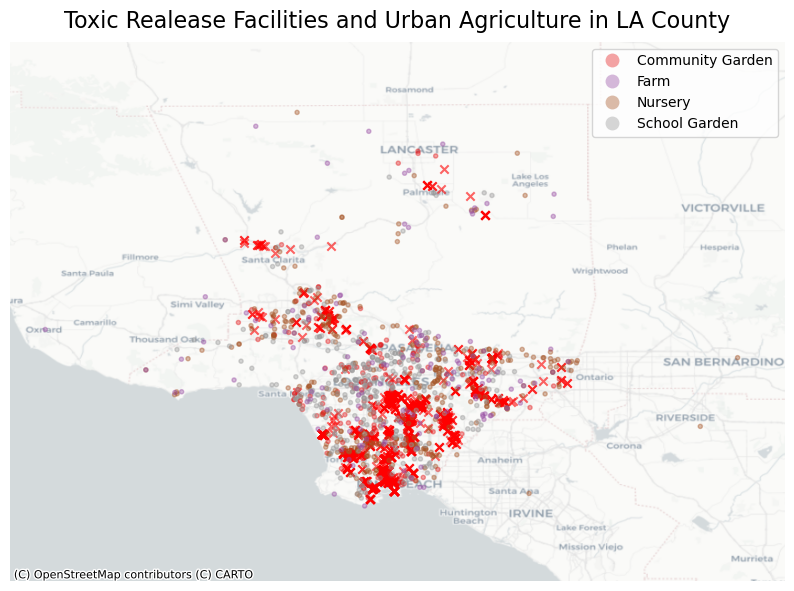

In [123]:
# quick plot
fig, ax = plt.subplots(figsize=(10,10))

# tox release layer
toxrelLACg2.plot(ax=ax,
                marker='x',
                color='red',
                alpha=.6,
                legend=False)
# urban ag layer
UALACg2.plot(ax=ax,
                column= 'type_',
                marker='.',
                cmap='Set1',
                alpha=.4,
                legend=True)
# customs
ax.axis('off')
ax.set_title("Toxic Realease Facilities and Urban Agriculture in LA County",fontsize=16, pad=10)

# focusing on LA County sans Avalon
ax.set_ylim(33.5,35)

# basemap
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

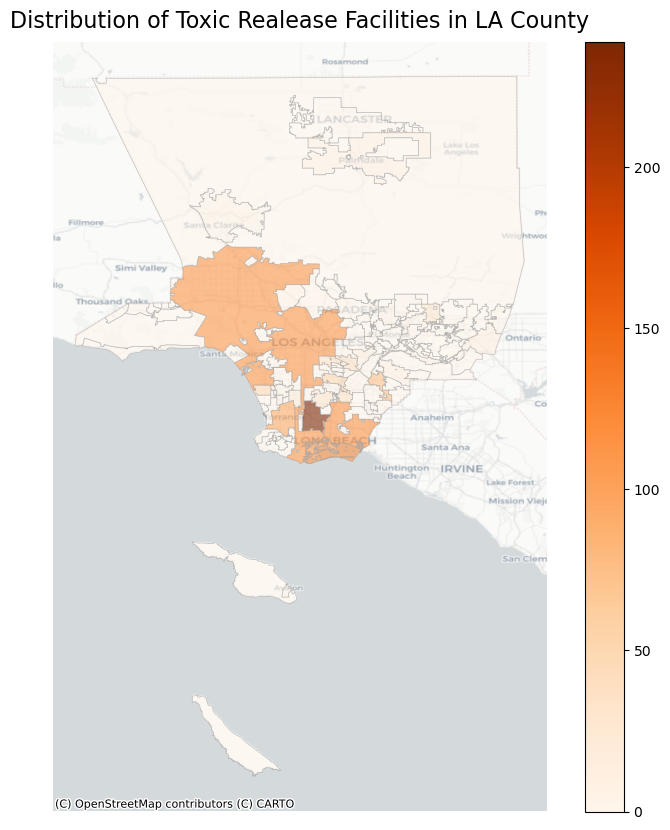

In [117]:
# Toxic release choropleth map
fig, ax = plt.subplots(figsize=(10,10))

# tox release layer
LACfinal.plot(ax=ax,
                column= 'Facilities',
                edgecolor = 'darkgrey',
                linewidth =.5,
                cmap='Oranges',
                alpha=.6,
                legend= True)

# customs
ax.axis('off')
ax.set_title("Distribution of Toxic Realease Facilities in LA County",fontsize=16, pad=10)

# focusing on LA County sans Avalon
#ax.set_ylim(33.5,35)

# basemap
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

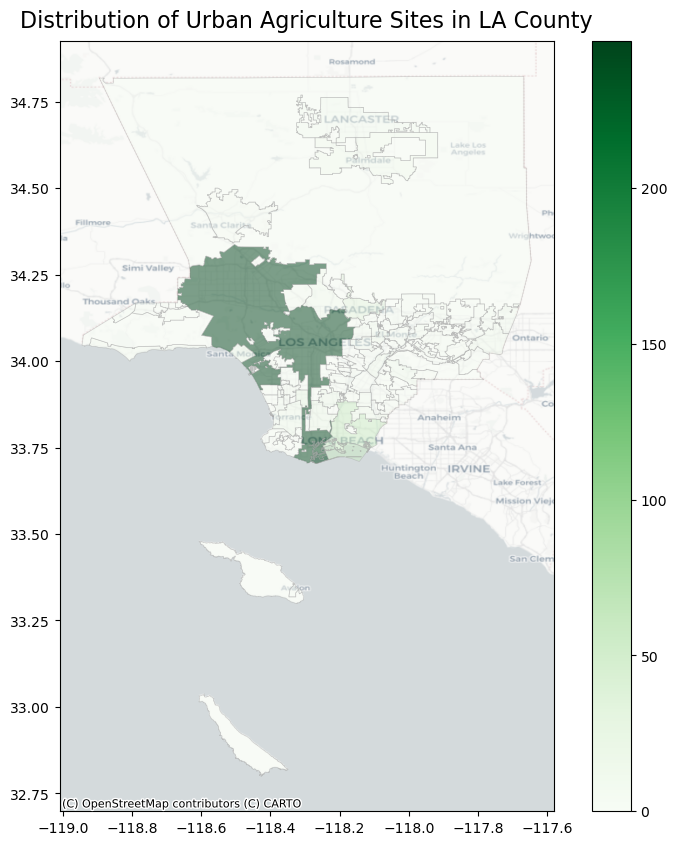

In [116]:
# Urban ag choropleth map
fig, ax = plt.subplots(figsize=(10,10))

# urban ag layer
LACfinal.plot(ax=ax,
                column= 'UA Sites',
                edgecolor = 'darkgrey',
                linewidth =.5,
                cmap='Greens',
                alpha=.5,
                legend=True)

# customs
#ax.axis('off')
ax.set_title("Distribution of Urban Agriculture Sites in LA County",fontsize=16, pad=10)

# focusing on LA County sans Avalon
#ax.set_ylim(33.5,35)

# basemap
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

In [119]:
# folium map: toggle layers

# base object: frame focus on LA County
LAC = folium.Map(location = [34, -118.3], zoom_start = 8, tiles= 'CartoDB positron', attribution = 'CartoDB')

# adding layer control
folium.LayerControl().add_to(LAC)

# adding toxic release layer
folium.Choropleth(
    geo_data=LACfinal,
    data=LACfinal,
    key_on='features.properties.CITY_LABEL',
    columns=['CITY_LABEL', 'Facilities'],
    fill_color='Oranges',
    line_weight=0.1,
    fill_opacity=0.5,
    line_opacity=0.4,
    legend_name= "Density of Toxic Release Facilities").add_to(LAC)

# adding urban ag layer
folium.Choropleth(
    geo_data=LACfinal,
    data=LACfinal,
    key_on='features.properties.CITY_LABEL',
    columns=['CITY_LABEL', 'UA Sites'],
    fill_color='Greens',
    line_weight=0.1,
    fill_opacity=0.5,
    line_opacity=0.4,
    legend_name= "Density of Urban Agriculture Sites").add_to(LAC)

TypeError: Object of type Timestamp is not JSON serializable

In [ ]:
LAC